---
title: "DAS数据集说明"
format: pdf
---

# DAS 周界安防数据集说明文档

## 数据集概述
本数据集基于分布式声波传感（DAS）技术，用于周界安防系统的研究和开发。数据集包含多种入侵类型的信号数据，旨在支持机器学习模型的训练和测试，以实现对不同入侵行为的识别和分类。

## 数据集参数
- **采样频率 (fs)**: 16000 Hz
- **通道数 (channel_num)**: 50 (有效范围在30-50)
- **高通滤波截止频率 (wc)**: 5 Hz
- **字节序 (endian)**: 大端序 (big-endian)
- **信号长度**: 160000 个采样点（10秒）

## 入侵类型
数据集包含以下入侵类型：
- **攀爬 (climb)**: 标签 0
- **敲击 (tap)**: 标签 1
- **晃动 (shaking)**: 标签 2
- **正常 (normal)**: 标签 3

## 数据格式
数据集以 HDF5 格式存储，文件名格式为 `das_dataset_YYYYMMDD_HHMMSS.h5`。主要结构如下：

![CleanShot 2024-09-19 at 09.20.36@2x.png](<attachment:CleanShot 2024-09-19 at 09.20.36@2x.png>)

- **int_data**: 存储积分数据，每个样本为 160000 个浮点数。
- **metadata**: 存储每个样本的元数据，包括入侵类型、时间、位置等信息。
- **labels**: 整数数组，存储每个样本的标签。

## 元数据字段
每个样本的元数据包含以下字段：
- **intrusion_type**: 入侵类型（climb, tap, shaking, normal）
- **start_time**: 开始时间
- **end_time**: 结束时间
- **location**: 位置信息
- **intensity**: 入侵强度（默认为"中等"）
- **time_of_day**: 一天中的时间段
- **weather**: 天气情况
- **is_noisy**: 是否为噪声数据（仅适用于噪声数据集）

## 数据集划分
- **训练集 (train)**: 70% 的数据
- **验证集 (val)**: 15% 的数据
- **测试集 (test)**: 15% 的数据

## 使用说明

### 数据读取示例
以下是使用 Python 和 h5py 库读取数据集的示例代码：

```python

import h5py
import numpy as np
with h5py.File('das_dataset_20230501_120000.h5', 'r') as f:
    # 读取训练集数据
    train_data = f['train']['int_data']
    train_labels = f['train']['labels'][:]
    # 读取单个样本及其元数据
    sample_key = list(train_data.keys())[0]
    sample_data = train_data[sample_key][:]
    sample_metadata = eval(f['train']['metadata'][sample_key][()])
    # 打印数据集属性
    print(f"采样频率: {f.attrs['fs']} Hz")
    print(f"通道数: {f.attrs['channel_num']}")
    print(f"高通滤波截止频率: {f.attrs['wc']} Hz")
    print(f"字节序: {f.attrs['endian']}")
    # 打印样本信息
    print(f"样本形状: {sample_data.shape}")
    print(f"样本标签: {train_labels[0]}")
    print(f"样本元数据: {sample_metadata}")
```



### 数据处理建议
1. 对数据进行归一化或标准化处理。
2. 考虑使用短时傅里叶变换（STFT）或小波变换进行时频分析。
3. 根据需要进行数据增强，如添加噪声、时间偏移等。

## 注意事项
- 使用数据集时请遵守相关的伦理和法律规定。
- 部分样本可能存在噪声或异常，建议在预处理阶段进行筛选。
- 模型训练时应考虑类别不平衡问题，可能需要采用过采样或欠采样技术。

## 版本信息
- 版本号：1.0

## 联系方式
如有任何问题或需要支持，请联系：
- 邮箱：wangqianlong@asptech.com.cn
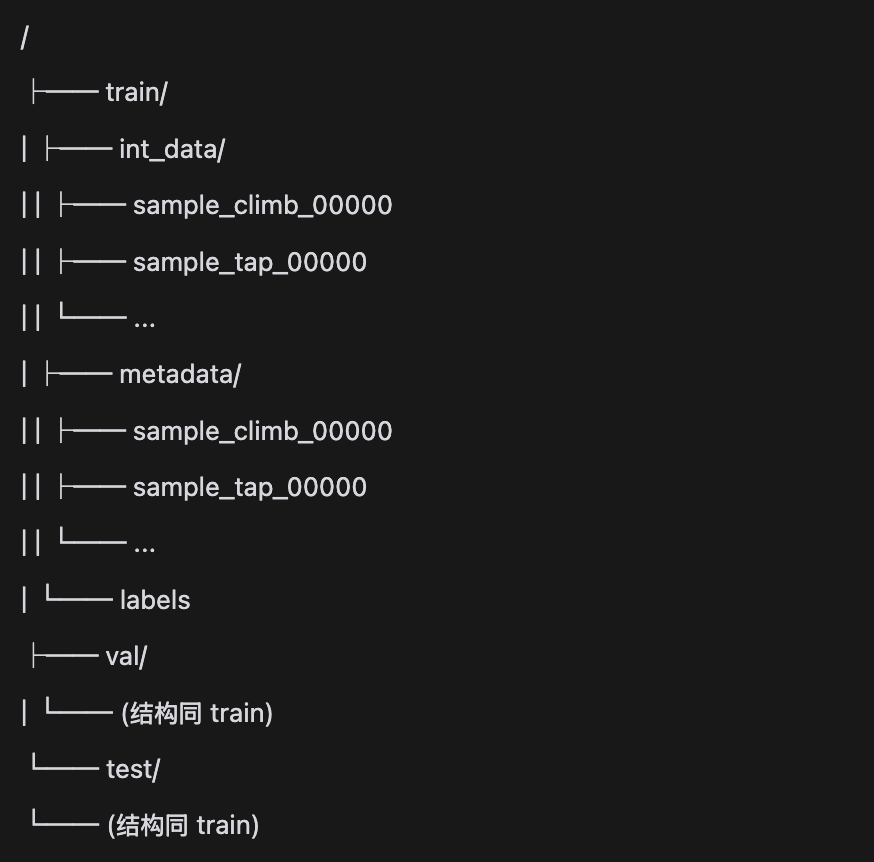

In [1]:
# 设置绘图参数
from matplotlib import pyplot as plt
from matplotlib import rcParams

config = {
    "font.family": "Arial Unicode MS",
    "font.size": 10,  # 相当于小四大小
    "axes.unicode_minus": False,  # 处理负号，即-号
}
rcParams.update(config)


In [4]:
import h5py
import numpy as np
from pathlib import Path

# 使用 Path 赋予相对路径
# dataset_path = Path("../das_dataset_20240919_083309.h5").resolve()
dataset_path = Path("../das_dataset_20240924_100734.h5").resolve()
print(f"数据集路径: {dataset_path}")

if dataset_path.exists():
    print("数据集文件存在")
else:
    print("数据集文件不存在")

# dataset_path = "/Users/qianlong/联河光子/Projects/周界安防/DAS_Perimeter_Security_Intrusion_Dataset/das_dataset_20240919_083309.h5"
with h5py.File(dataset_path, "r") as f:
    # 读取训练集数据
    train_data = f["train"]["int_data"]
    train_labels = f["train"]["labels"][:]
    # 读取单个样本及其元数据
    sample_key = list(train_data.keys())[0]
    sample_data = train_data[sample_key][:]
    sample_metadata = eval(f["train"]["metadata"][sample_key][()])
    # 打印数据集属性
    print(f"采样频率: {f.attrs['fs']} Hz")
    print(f"通道数: {f.attrs['channel_num']}")
    print(f"高通滤波截止频率: {f.attrs['wc']} Hz")
    print(f"字节序: {f.attrs['endian']}")
    # 打印样本信息
    print(f"样本形状: {sample_data.shape}")
    print(f"样本标签: {train_labels[0]}")
    print(f"样本元数据: {sample_metadata}")


数据集路径: /Users/qianlong/联河光子/Projects/周界安防/DAS_Perimeter_Security_Intrusion_Dataset/das_dataset_20240924_100734.h5
数据集文件存在
采样频率: 16000 Hz
通道数: 50
高通滤波截止频率: 1 Hz
字节序: big
样本形状: (160000,)
样本标签: 3
样本元数据: {'intrusion_type': 'climb', 'start_time': 'climb-2m-fs16000Hz-20240828-morning-site45-sample33(6)_wind', 'end_time': 'climb-2m-fs16000Hz-20240828-morning-site45-sample33(6)_wind', 'location': '点位45', 'intensity': '中等', 'time_of_day': 'morning', 'weather': '未知', 'is_noisy': True}


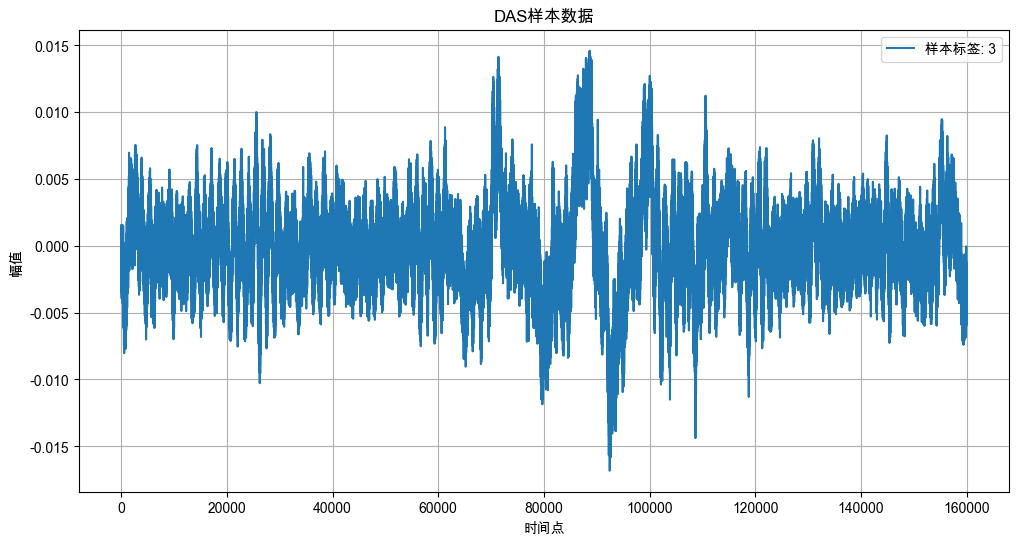

In [5]:
# 选择一个样本进行绘图
# 可以根据需要选择不同的样本索引
sample_index = 0

# 检查数据集是否有效
with h5py.File(dataset_path, "r") as f:
    train_data = f["train"]["int_data"]
    train_labels = f["train"]["labels"][:]

    # 检查样本索引是否在有效范围内
    if sample_index < len(train_data):
        sample_key = list(train_data.keys())[sample_index]  # 使用样本索引获取样本键
        sample_data = train_data[sample_key][:]  # 获取样本数据
        sample_label = train_labels[sample_index]  # 获取样本标签

        # 绘制样本数据
        plt.figure(figsize=(12, 6))
        plt.plot(sample_data, label=f"样本标签: {sample_label}")
        plt.title("DAS样本数据")
        plt.xlabel("时间点")
        plt.ylabel("幅值")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("错误：样本索引超出范围，请选择有效的样本索引。")
